In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier 

In [2]:
df = pd.read_csv('vuelos_clean1.csv')
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,...,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT,DELAY_STATUS
0,11,1,5,B6,CHS,124,636,324,323,448,...,58,W,25,38,29.86,Fair / Windy,9,17,14,0
1,11,1,5,B6,LAX,371,2475,340,333,531,...,58,W,25,38,29.86,Fair / Windy,9,17,15,0
2,11,1,5,B6,FLL,181,1069,301,341,482,...,58,W,25,38,29.86,Fair / Windy,9,17,22,1
3,11,1,5,B6,MCO,168,944,345,343,513,...,58,W,25,38,29.86,Fair / Windy,9,17,12,0
4,11,1,5,DL,ATL,139,760,360,356,499,...,58,W,24,35,29.91,Fair / Windy,9,17,13,0


### Multicolinealidad

In [ ]:
# vemos la correlacion que existe entre nuestras columnas para poder usarlas.

/var/folders/bg/4d0w7gdx0578w94pqg4phn080000gn/T/ipykernel_2130/2840840165.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="crest", linewidths=1)


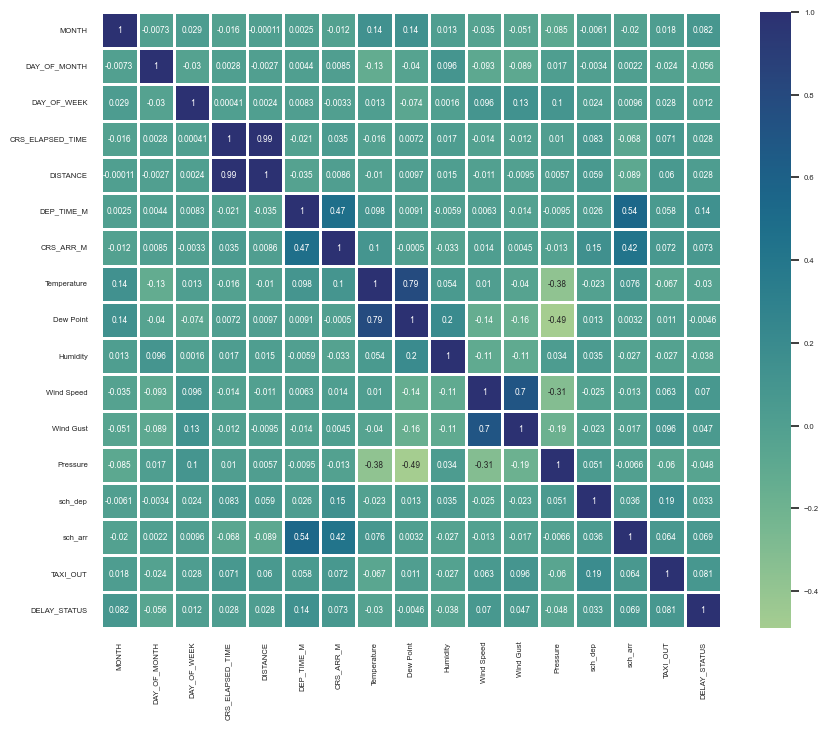

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="crest", linewidths=1)
plt.show()

##### ALTAMENTE correlacionados:
###### -CRS_DEP_M. Y DEP_TIME_M  .95
###### -DISTANCE Y CRS_ELASPSED_TIME .99
###### -DEW_POINT Y Temperature .79
###### -wind gust y wind speed .7

In [11]:
#PODEMOS VER QUE CRS_DEP_M Y DEP_TIME AMBOS SE REFIEREN AL TIEMPO DE SALIDA U HORA.
#asi que eliminaremos la columna crs_dep_m 
df.drop(['CRS_DEP_M'] , inplace =True , axis=1) 
df


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,CRS_ELAPSED_TIME,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,...,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT,DELAY_STATUS
0,11,1,5,B6,CHS,124,636,323,448,48,...,58,W,25,38,29.86,Fair / Windy,9,17,14,0
1,11,1,5,B6,LAX,371,2475,333,531,48,...,58,W,25,38,29.86,Fair / Windy,9,17,15,0
2,11,1,5,B6,FLL,181,1069,341,482,48,...,58,W,25,38,29.86,Fair / Windy,9,17,22,1
3,11,1,5,B6,MCO,168,944,343,513,48,...,58,W,25,38,29.86,Fair / Windy,9,17,12,0
4,11,1,5,DL,ATL,139,760,356,499,46,...,58,W,24,35,29.91,Fair / Windy,9,17,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28813,1,31,5,B6,ORH,57,150,1372,1427,39,...,96,N,6,0,30.18,Cloudy,20,32,19,1
28814,1,31,5,AA,BOS,75,187,1392,25,39,...,96,N,6,0,30.18,Cloudy,19,23,22,1
28815,1,31,5,AS,SEA,392,2422,1408,1337,39,...,96,N,6,0,30.18,Cloudy,19,23,21,1
28816,1,31,5,B6,SJU,224,1598,1422,261,39,...,96,N,6,0,30.18,Cloudy,19,23,13,1


In [4]:
#seguimos viendo si estan altamente relacionados.

df.select_dtypes(np.number).columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_ELAPSED_TIME', 'DISTANCE',
       'CRS_DEP_M', 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point',
       'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr',
       'TAXI_OUT', 'DELAY_STATUS'],
      dtype='object')

In [21]:
features = ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_ELAPSED_TIME', 'DISTANCE'
            , 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point',
       'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr',
       'TAXI_OUT']

In [25]:
def calculate_vif(df, features):    
    vif, tolerance, r2sq = {}, {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        r2sq[feature] = r2
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance, 'R2': r2sq})

In [30]:
calculate_vif(df,features)  # observamos que CRS_ELAPSED_TIME y DISTANCE  son las mas altas de nuevo.

,VIF,Tolerance,R2
MONTH,1.051119,0.951367,0.048633
DAY_OF_MONTH,1.048905,0.953375,0.046625
DAY_OF_WEEK,1.049843,0.952524,0.047476
CRS_ELAPSED_TIME,106.490190,0.009391,0.990609
DISTANCE,106.155767,0.009420,0.990580
DEP_TIME_M,1.591211,0.628452,0.371548
CRS_ARR_M,1.456859,0.686408,0.313592
Temperature,3.173260,0.315133,0.684867
Dew Point,4.021816,0.248644,0.751356
Humidity,1.108036,0.902498,0.097502


In [29]:
#ahora llamare de nuevo mis features pero sin CRS_ELAPSED_TIME ya que tiene una alta coliniaridad.
features_2= ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DISTANCE'
            , 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point',
       'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr',
       'TAXI_OUT']
calculate_vif(df,features_2)

,VIF,Tolerance,R2
MONTH,1.027987,0.972775,0.027225
DAY_OF_MONTH,1.047288,0.954848,0.045152
DAY_OF_WEEK,1.049627,0.952719,0.047281
DISTANCE,1.017422,0.982876,0.017124
DEP_TIME_M,1.589871,0.628982,0.371018
CRS_ARR_M,1.411735,0.708348,0.291652
Temperature,3.154744,0.316983,0.683017
Dew Point,4.008681,0.249459,0.750541
Humidity,1.107953,0.902565,0.097435
Wind Speed,2.272296,0.440084,0.559916


In [31]:
df_2 = df[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DISTANCE'
            , 'DEP_TIME_M', 'CRS_ARR_M', 'Temperature', 'Dew Point',
       'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr',
       'TAXI_OUT']]
df_2

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,636,323,448,48,34,58,25,38,29.86,9,17,14
1,11,1,5,2475,333,531,48,34,58,25,38,29.86,9,17,15
2,11,1,5,1069,341,482,48,34,58,25,38,29.86,9,17,22
3,11,1,5,944,343,513,48,34,58,25,38,29.86,9,17,12
4,11,1,5,760,356,499,46,32,58,24,35,29.91,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28813,1,31,5,150,1372,1427,39,38,96,6,0,30.18,20,32,19
28814,1,31,5,187,1392,25,39,38,96,6,0,30.18,19,23,22
28815,1,31,5,2422,1408,1337,39,38,96,6,0,30.18,19,23,21
28816,1,31,5,1598,1422,261,39,38,96,6,0,30.18,19,23,13


In [32]:
categoricals = df.select_dtypes(np.object)
categoricals

/var/folders/bg/4d0w7gdx0578w94pqg4phn080000gn/T/ipykernel_2130/983254351.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = df.select_dtypes(np.object)


,OP_UNIQUE_CARRIER,DEST,Wind,Condition
0,B6,CHS,W,Fair / Windy
1,B6,LAX,W,Fair / Windy
2,B6,FLL,W,Fair / Windy
3,B6,MCO,W,Fair / Windy
4,DL,ATL,W,Fair / Windy
...,...,...,...,...
28813,B6,ORH,N,Cloudy
28814,AA,BOS,N,Cloudy
28815,AS,SEA,N,Cloudy
28816,B6,SJU,N,Cloudy


### Chi-square Test